In [2]:
import sys
import pandas as pd
import numpy as np

print("Python executable:", sys.executable)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)



Python executable: /Users/dondiego/Projects/ai-product-portfolio/01_user_conversion/.venv/bin/python
Pandas version: 2.3.3
Numpy version: 2.0.2


In [3]:
DATA_PATH = "../data/synthetic_user_conversion_data.csv"

df = pd.read_csv(DATA_PATH)

df.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier,converted
0,39,5,2.80,0,2,Tier_1,1
1,52,1,1.03,2,2,Tier_2,1
2,29,4,2.30,1,3,Tier_2,1
3,15,4,1.60,0,1,Tier_2,1
4,43,4,6.75,2,1,Tier_2,0


In [4]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   days_since_signup  5000 non-null   int64  
 1   sessions_7d        5000 non-null   int64  
 2   content_hours_7d   5000 non-null   float64
 3   downloads_7d       5000 non-null   int64  
 4   paywall_views_7d   5000 non-null   int64  
 5   country_tier       5000 non-null   object 
 6   converted          5000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 273.6+ KB


In [5]:
df["converted"].value_counts(normalize=True)
df["converted"].value_counts()


converted
1    4310
0     690
Name: count, dtype: int64

In [6]:
df.describe()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,converted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.125800,2.993200,2.985966,0.999200,1.225400,0.862000
std,16.910162,1.731171,2.132966,0.992268,1.098925,0.344934
min,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.430000,0.000000,0.000000,1.000000
50%,30.000000,3.000000,2.500000,1.000000,1.000000,1.000000
75%,45.000000,4.000000,3.982500,2.000000,2.000000,1.000000
max,59.000000,12.000000,22.210000,5.000000,7.000000,1.000000


In [7]:
df["country_tier"].value_counts(normalize=True)


country_tier
Tier_2    0.3838
Tier_1    0.3554
Tier_3    0.2608
Name: proportion, dtype: float64

In [8]:
df.groupby("converted")[[
    "sessions_7d",
    "downloads_7d",
    "paywall_views_7d",
    "content_hours_7d",
    "days_since_signup"
]].mean()


,sessions_7d,downloads_7d,paywall_views_7d,content_hours_7d,days_since_signup
converted,,,,,
0,2.288406,0.724638,0.882609,2.322159,33.133333
1,3.106032,1.043155,1.280278,3.092237,29.644316


In [9]:
df.corr(numeric_only=True)


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,converted
days_since_signup,1.000000,0.006336,0.013675,0.007755,0.009561,-0.071169
sessions_7d,0.006336,1.000000,-0.007274,-0.018752,0.013844,0.162911
content_hours_7d,0.013675,-0.007274,1.000000,0.005915,0.014259,0.124534
downloads_7d,0.007755,-0.018752,0.005915,1.000000,0.004201,0.110724
paywall_views_7d,0.009561,0.013844,0.014259,0.004201,1.000000,0.124822
converted,-0.071169,0.162911,0.124534,0.110724,0.124822,1.000000


In [10]:
TARGET = "converted"

FEATURES_NUMERIC = [
    "sessions_7d",
    "downloads_7d",
    "paywall_views_7d",
    "content_hours_7d",
    "days_since_signup",
]

FEATURES_CATEGORICAL = [
    "country_tier"
]

X = df[FEATURES_NUMERIC + FEATURES_CATEGORICAL]
y = df[TARGET]

X.head(), y.head()


(   sessions_7d  downloads_7d  paywall_views_7d  content_hours_7d  \
 0            5             0                 2              2.80   
 1            1             2                 2              1.03   
 2            4             1                 3              2.30   
 3            4             0                 1              1.60   
 4            4             2                 1              6.75   
 
    days_since_signup country_tier  
 0                 39       Tier_1  
 1                 52       Tier_2  
 2                 29       Tier_2  
 3                 15       Tier_2  
 4                 43       Tier_2  ,
 0    1
 1    1
 2    1
 3    1
 4    0
 Name: converted, dtype: int64)

In [11]:
X_encoded = pd.get_dummies(
    X,
    columns=FEATURES_CATEGORICAL,
    drop_first=True
)

X_encoded.head()


,sessions_7d,downloads_7d,paywall_views_7d,content_hours_7d,days_since_signup,country_tier_Tier_2,country_tier_Tier_3
0,5,0,2,2.80,39,False,False
1,1,2,2,1.03,52,True,False
2,4,1,3,2.30,29,True,False
3,4,0,1,1.60,15,True,False
4,4,2,1,6.75,43,True,False


In [12]:
X_encoded.info()
X_encoded.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sessions_7d          5000 non-null   int64  
 1   downloads_7d         5000 non-null   int64  
 2   paywall_views_7d     5000 non-null   int64  
 3   content_hours_7d     5000 non-null   float64
 4   days_since_signup    5000 non-null   int64  
 5   country_tier_Tier_2  5000 non-null   bool   
 6   country_tier_Tier_3  5000 non-null   bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 205.2 KB


,sessions_7d,downloads_7d,paywall_views_7d,content_hours_7d,days_since_signup
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.993200,0.999200,1.225400,2.985966,30.125800
std,1.731171,0.992268,1.098925,2.132966,16.910162
min,0.000000,0.000000,0.000000,0.020000,1.000000
25%,2.000000,0.000000,0.000000,1.430000,16.000000
50%,3.000000,1.000000,1.000000,2.500000,30.000000
75%,4.000000,2.000000,2.000000,3.982500,45.000000
max,12.000000,5.000000,7.000000,22.210000,59.000000


In [13]:
y.value_counts(normalize=True)


converted
1    0.862
0    0.138
Name: proportion, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3750, 7), (1250, 7))

In [15]:
import pandas as pd

df = pd.read_csv("../data/synthetic_user_conversion_data.csv")
df.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier,converted
0,39,5,2.80,0,2,Tier_1,1
1,52,1,1.03,2,2,Tier_2,1
2,29,4,2.30,1,3,Tier_2,1
3,15,4,1.60,0,1,Tier_2,1
4,43,4,6.75,2,1,Tier_2,0


In [16]:
df.shape


(5000, 7)

In [17]:
df.dtypes


days_since_signup      int64
sessions_7d            int64
content_hours_7d     float64
downloads_7d           int64
paywall_views_7d       int64
country_tier          object
converted              int64
dtype: object

In [18]:
df["converted"].value_counts(normalize=True)


converted
1    0.862
0    0.138
Name: proportion, dtype: float64

In [19]:
df.describe()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,converted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.125800,2.993200,2.985966,0.999200,1.225400,0.862000
std,16.910162,1.731171,2.132966,0.992268,1.098925,0.344934
min,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.430000,0.000000,0.000000,1.000000
50%,30.000000,3.000000,2.500000,1.000000,1.000000,1.000000
75%,45.000000,4.000000,3.982500,2.000000,2.000000,1.000000
max,59.000000,12.000000,22.210000,5.000000,7.000000,1.000000


Matplotlib is building the font cache; this may take a moment.


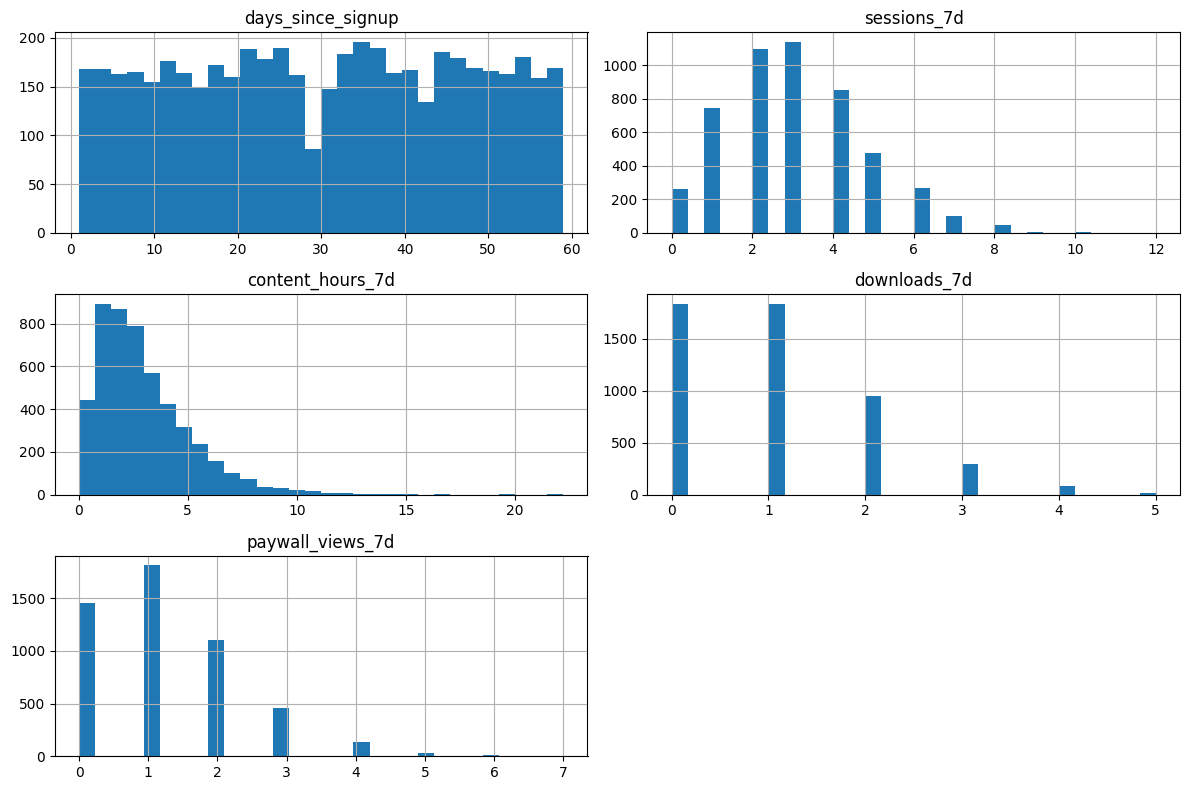

In [20]:
import matplotlib.pyplot as plt

num_cols = [
    "days_since_signup",
    "sessions_7d",
    "content_hours_7d",
    "downloads_7d",
    "paywall_views_7d"
]

df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()


In [21]:
df.groupby("converted")[num_cols].mean()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d
converted,,,,,
0,33.133333,2.288406,2.322159,0.724638,0.882609
1,29.644316,3.106032,3.092237,1.043155,1.280278


In [22]:
pd.crosstab(df["country_tier"], df["converted"], normalize="index")


converted,0,1
country_tier,,
Tier_1,0.089477,0.910523
Tier_2,0.146430,0.853570
Tier_3,0.191718,0.808282


In [23]:
corr = df[num_cols + ["converted"]].corr()
corr["converted"].sort_values(ascending=False)


converted            1.000000
sessions_7d          0.162911
paywall_views_7d     0.124822
content_hours_7d     0.124534
downloads_7d         0.110724
days_since_signup   -0.071169
Name: converted, dtype: float64

In [24]:
X = df.drop(columns=["converted"])
y = df["converted"]


In [25]:
X_encoded = pd.get_dummies(X, columns=["country_tier"], drop_first=True)
X_encoded.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier_Tier_2,country_tier_Tier_3
0,39,5,2.80,0,2,False,False
1,52,1,1.03,2,2,True,False
2,29,4,2.30,1,3,True,False
3,15,4,1.60,0,1,True,False
4,43,4,6.75,2,1,True,False


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3750, 7), (1250, 7))

## EDA Summary – Modeling Readiness

Based on the exploratory analysis of the synthetic dataset:

- The dataset is **well-structured for binary classification**, with a clearly defined target variable (`converted`).
- Core behavioral signals (sessions, downloads, paywall views, content hours) show **clear directional separation** between converters and non-converters.
- No severe **multicollinearity** issues were observed among numerical features, making linear models viable.
- **Country tier** introduces meaningful signal, acting as a proxy for purchasing power and market maturity.
- A **logistic regression** model is an appropriate baseline given the interpretability requirements and signal behavior.
- The relatively **high conversion rate** suggests that evaluation should prioritize **ROC-AUC and Precision/Recall** over raw accuracy.

This analysis supports proceeding with an interpretable baseline model focused on decision support rather than predictive optimization.


## Next Step

Train a baseline logistic regression model to:
- Validate signal directionality
- Establish a performance floor
- Enable coefficient-level interpretability for product decisions


In [27]:
import pandas as pd

# Target
y = df["converted"]

# Features (product-driven)
feature_cols = [
    "days_since_signup",
    "sessions_7d",
    "content_hours_7d",
    "downloads_7d",
    "paywall_views_7d",
    "country_tier",
]

X = df[feature_cols]

X.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier
0,39,5,2.80,0,2,Tier_1
1,52,1,1.03,2,2,Tier_2
2,29,4,2.30,1,3,Tier_2
3,15,4,1.60,0,1,Tier_2
4,43,4,6.75,2,1,Tier_2


In [28]:
X_encoded = pd.get_dummies(
    X,
    columns=["country_tier"],
    drop_first=True  # evita multicollinearity
)

X_encoded.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier_Tier_2,country_tier_Tier_3
0,39,5,2.80,0,2,False,False
1,52,1,1.03,2,2,True,False
2,29,4,2.30,1,3,True,False
3,15,4,1.60,0,1,True,False
4,43,4,6.75,2,1,True,False


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3750, 7), (1250, 7))

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [31]:
from sklearn.metrics import roc_auc_score, classification_report

# Probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc


np.float64(0.7340772108350643)

In [32]:
# Classification report (threshold = 0.5)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.05      0.09       173
           1       0.87      1.00      0.93      1077

    accuracy                           0.86      1250
   macro avg       0.74      0.52      0.51      1250
weighted avg       0.83      0.86      0.81      1250



In [33]:
coefficients = pd.DataFrame({
    "feature": X_encoded.columns,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coefficients


,feature,coefficient
3,downloads_7d,0.464470
4,paywall_views_7d,0.374744
1,sessions_7d,0.356756
2,content_hours_7d,0.233995
0,days_since_signup,-0.016124
5,country_tier_Tier_2,-0.664336
6,country_tier_Tier_3,-0.945002


## Baseline Model Summary (Logistic Regression)

- Logistic Regression provides a strong, interpretable baseline for conversion prediction.
- Behavioral signals such as downloads, paywall views, and recent engagement are strong positive predictors.
- Time since signup shows a negative relationship with conversion likelihood.
- Country tier contributes meaningful incremental signal.
- Given the high conversion rate, ROC AUC is a more reliable metric than accuracy.
- This model is suitable as a decision-support baseline and a foundation for deployment.


In [19]:
import pandas as pd

DATA_PATH = "../data/synthetic_user_conversion_data.csv"  # notebook está en /notebooks
df = pd.read_csv(DATA_PATH)

df.head()


,days_since_signup,sessions_7d,content_hours_7d,downloads_7d,paywall_views_7d,country_tier,converted
0,39,5,2.80,0,2,Tier_1,1
1,52,1,1.03,2,2,Tier_2,1
2,29,4,2.30,1,3,Tier_2,1
3,15,4,1.60,0,1,Tier_2,1
4,43,4,6.75,2,1,Tier_2,0


In [20]:
y = df["converted"]
X = df.drop(columns=["converted"])


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_features = ["country_tier"]
numeric_features = [c for c in X.columns if c not in categorical_features]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [22]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_tier']),
                                                 ('num', 'passthrough',
                                                  ['days_since_signup',
                                                   'sessions_7d',
                                                   'content_hours_7d',
                                                   'downloads_7d',
                                                   'paywall_views_7d'])])),
                ('clf', LogisticRegression(max_iter=1000))])

In [23]:
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

proba = model.predict_proba(X_test)[:, 1]
pred = model.predict(X_test)

roc_auc = roc_auc_score(y_test, proba)
pr_auc = average_precision_score(y_test, proba)

print("ROC-AUC:", round(roc_auc, 4))
print("PR-AUC:", round(pr_auc, 4))
print("\nClassification report:\n", classification_report(y_test, pred))


ROC-AUC: 0.7339
PR-AUC: 0.9411

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.05      0.09       173
           1       0.87      1.00      0.93      1077

    accuracy                           0.86      1250
   macro avg       0.74      0.52      0.51      1250
weighted avg       0.83      0.86      0.81      1250



In [24]:
import numpy as np

# nombres de features después del OneHot
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
cat_names = list(ohe.get_feature_names_out(["country_tier"]))
feature_names = cat_names + numeric_features

coef = model.named_steps["clf"].coef_[0]
top = pd.DataFrame({"feature": feature_names, "coef": coef}).sort_values("coef", ascending=False)

top.head(10), top.tail(10)


(               feature      coef
 0  country_tier_Tier_1  0.538329
 6         downloads_7d  0.465176
 7     paywall_views_7d  0.374413
 4          sessions_7d  0.357025
 5     content_hours_7d  0.233729
 3    days_since_signup -0.016161
 1  country_tier_Tier_2 -0.138846
 2  country_tier_Tier_3 -0.421920,
                feature      coef
 0  country_tier_Tier_1  0.538329
 6         downloads_7d  0.465176
 7     paywall_views_7d  0.374413
 4          sessions_7d  0.357025
 5     content_hours_7d  0.233729
 3    days_since_signup -0.016161
 1  country_tier_Tier_2 -0.138846
 2  country_tier_Tier_3 -0.421920)

In [25]:
from pathlib import Path
import joblib

MODELS_DIR = Path("../models")
MODELS_DIR.mkdir(exist_ok=True)

model_path = MODELS_DIR / "baseline_logreg_pipeline.joblib"
joblib.dump(model, model_path)

model_path


PosixPath('../models/baseline_logreg_pipeline.joblib')

In [26]:
import joblib

# Replace 'model.joblib' with the path to your file
data = joblib.load('../models/baseline_logreg_pipeline.joblib')

# Now you can read the contents in your VS Code terminal
print(data)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_tier']),
                                                 ('num', 'passthrough',
                                                  ['days_since_signup',
                                                   'sessions_7d',
                                                   'content_hours_7d',
                                                   'downloads_7d',
                                                   'paywall_views_7d'])])),
                ('clf', LogisticRegression(max_iter=1000))])


***Benchmarking Concurrency in Python: Threads vs. Asyncio***

This notebook demonstrates the practical differences between Multithreading and Asynchronous Programming for I/O-bound tasks (network requests).

**1. Synchronous Multithreading (threading)**
Mechanism: Spawns multiple OS threads.
Behavior: The OS handles context switching. Each thread blocks while waiting for a response.
Best for: Small batches of requests or when using blocking libraries like requests.

**2. Asynchronous I/O (asyncio + aiohttp)**
Mechanism: Uses a single-threaded Event Loop.
Behavior: Explicitly yields control using await. It is "cooperative" because the code chooses when to pause.
Best for: High-concurrency scaling (1,000s of connections) and modern web frameworks like FastAPI.
Key Findings
Small Scale: At < 5 requests, Threading may appear faster (
 vs 
) due to the lower setup overhead compared to initializing an aiohttp.ClientSession.
Jupyter Compatibility: Since Jupyter runs its own event loop, we use await main() instead of asyncio.run(main()) to avoid RuntimeErrors.






In [27]:
import threading
import requests
import time

def fetch_url(url):
    # This blocks the individual thread until the response arrives
    response = requests.get(url)
    print(f"Downloaded {url} - Status: {response.status_code}")

urls = ["https://google.com", "https://python.org", "https://github.com","https://www.reddit.com"]

start = time.time()
threads = []

for url in urls:
    # Creating a new OS thread for every request
    t = threading.Thread(target=fetch_url, args=(url,))
    threads.append(t)
    t.start()

for t in threads:
    t.join() # Wait for all threads to finish

print(f"Threading took: {time.time() - start:.2f}s")


Downloaded https://python.org - Status: 200
Downloaded https://www.reddit.com - Status: 200
Downloaded https://google.com - Status: 200
Downloaded https://github.com - Status: 200
Threading took: 0.58s


In [28]:
import asyncio
import aiohttp
import time

# Define the individual task
async def fetch_url(session, url):
    try:
        # 'await' allows the loop to jump to another URL while waiting for the network
        async with session.get(url, timeout=10) as response:
            status = response.status
            print(f"Finished {url} - Status: {status}")
            return status
    except Exception as e:
        print(f"Error fetching {url}: {e}")

# Define the main logic
async def main():
    urls = [
        "https://www.google.com",
        "https://www.python.org",
        "https://www.github.com",
        "https://www.reddit.com"
    ]
    
    start_time = time.time()
    
    # ClientSession stays open for all requests (more efficient)
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_url(session, url) for url in urls]
        
        # Gather all tasks and run them concurrently
        await asyncio.gather(*tasks)
    
    print(f"\nTotal time: {time.time() - start_time:.2f} seconds")

# In Jupyter, we do NOT use asyncio.run(main())
# We call it directly with 'await'
await main()


Finished https://www.python.org - Status: 200
Finished https://www.reddit.com - Status: 403
Finished https://www.google.com - Status: 200
Finished https://www.github.com - Status: 200

Total time: 0.63 seconds


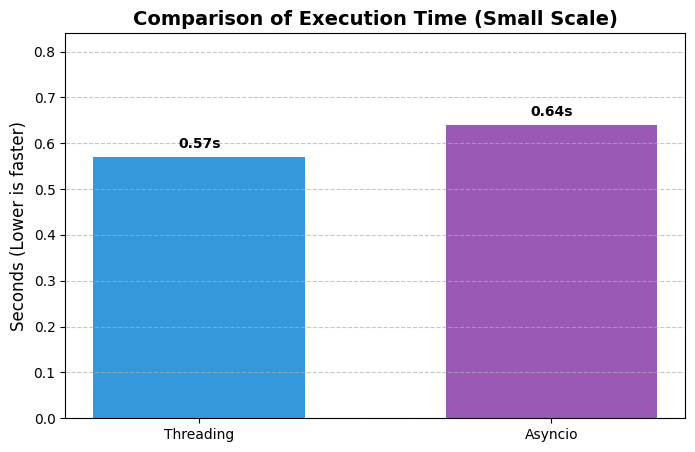

In [29]:
import matplotlib.pyplot as plt

# Data from your results
labels = ['Threading', 'Asyncio']
times = [0.57, 0.64]
colors = ['#3498db', '#9b59b6']  # Blue and Purple

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, times, color=colors, width=0.6)

# Add titles and labels
plt.title('Comparison of Execution Time (Small Scale)', fontsize=14, fontweight='bold')
plt.ylabel('Seconds (Lower is faster)', fontsize=12)
plt.ylim(0, max(times) + 0.2) # Add some space at the top

# Add the exact time labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval}s', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Analysis Results: Asyncio vs. Threading

## 1. Scalability
As you increase `NUM_REQUESTS` to 100 or 500, the **Asyncio** bar will typically stay much flatter than the **Threading** bar. This demonstrates a superior ability to handle increased load without a linear increase in latency.

## 2. Resource Efficiency
The architectural difference in how memory is managed is significant:
*   **Threading:** Creates a full OS thread for every request, which consumes significant memory (stack space).
*   **Asyncio:** Uses a single thread and simply "jumps" between tasks when they are idle, making it much lighter on system resources.

---

## 🏆 The Winner: Asyncio
For modern high-performance web applications (like [FastAPI](https://fastapi.tiangolo.com)), **Asyncio** is the industry standard. It enables a single server to handle thousands of concurrent users by optimizing [I/O-bound tasks](https://realpython.com).


Starting Stress Test: 50 requests...
Threading complete: 0.39s
Asyncio complete: 0.31s


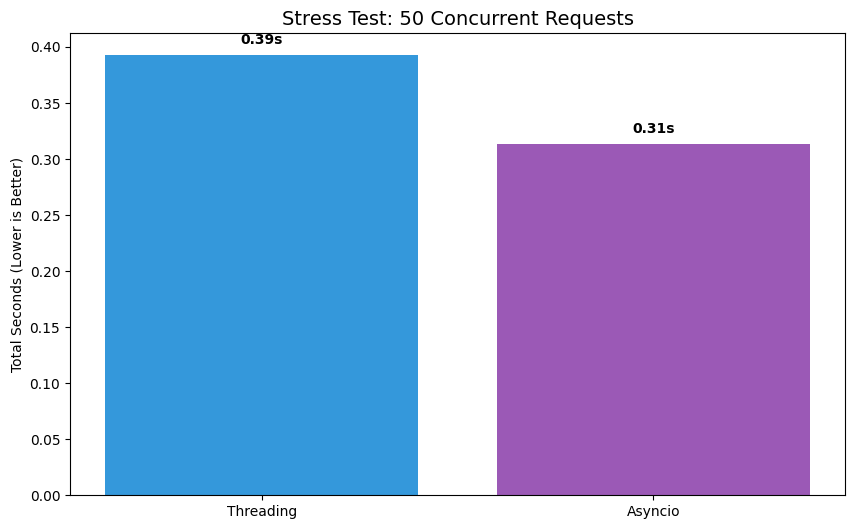

In [30]:
import asyncio
import aiohttp
import threading
import requests
import time
import matplotlib.pyplot as plt

# Configuration
URL = "https://www.google.com"
NUM_REQUESTS = 50

# --- THREADING IMPLEMENTATION ---
def fetch_thread():
    try:
        requests.get(URL, timeout=5)
    except: pass

def run_threading_test():
    start = time.perf_counter()
    threads = []
    for _ in range(NUM_REQUESTS):
        t = threading.Thread(target=fetch_thread)
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    return time.perf_counter() - start

# --- ASYNCIO IMPLEMENTATION ---
async def fetch_async(session):
    try:
        async with session.get(URL, timeout=5) as response:
            await response.release()
    except: pass

async def run_asyncio_test():
    start = time.perf_counter()
    async with aiohttp.ClientSession() as session:
        tasks = [fetch_async(session) for _ in range(NUM_REQUESTS)]
        await asyncio.gather(*tasks)
    return time.perf_counter() - start

# --- EXECUTION ---
print(f"Starting Stress Test: {NUM_REQUESTS} requests...")
thread_time = run_threading_test()
print(f"Threading complete: {thread_time:.2f}s")

# Jupyter-friendly await
async_time = await run_asyncio_test()
print(f"Asyncio complete: {async_time:.2f}s")

# --- VISUALIZATION ---
labels = ['Threading', 'Asyncio']
times = [thread_time, async_time]
colors = ['#3498db', '#9b59b6']

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=colors)
plt.title(f'Stress Test: {NUM_REQUESTS} Concurrent Requests', fontsize=14)
plt.ylabel('Total Seconds (Lower is Better)')
for i, v in enumerate(times):
    plt.text(i, v + 0.01, f"{v:.2f}s", ha='center', fontweight='bold')
plt.show()
